# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (18,7)
plt.rcParams["font.family"] = "monospace"
plt.rcParams['axes.edgecolor'] = 'black'

plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.linewidth'] = 1.5

import warnings
warnings.filterwarnings("ignore")

# 1.0 Data Inspection & Cleaning.

In [4]:
df = pd.read_csv('./data/abalone.csv')
df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 4177 rows and 10 columns.


In [6]:
df.isna().sum() #Check Missing Values

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

In [7]:
df.duplicated().sum() #Check Duplicated Values.

0

In [8]:
df['sex'] = df.sex.astype('category')

In [9]:
df.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   sex         4177 non-null   category
 1   length      4177 non-null   float64 
 2   diameter    4177 non-null   float64 
 3   height      4177 non-null   float64 
 4   whole_wt    4177 non-null   float64 
 5   shucked_wt  4177 non-null   float64 
 6   viscera_wt  4177 non-null   float64 
 7   shell_wt    4177 non-null   float64 
 8   rings       4177 non-null   int64   
 9   age         4177 non-null   float64 
dtypes: category(1), float64(8), int64(1)
memory usage: 298.0 KB


Should be noticed that the `rings` feature in the abalone characteristics dataset is redundant because it is just the `age` of the abalone minus 1.5. Therefore, we have decided to drop the `rings` feature from the dataset to avoid redundancy and to simplify the dataset.

In [11]:
# `Age` feature is justa linear combination of `Rings`, so it doesn't add any new information.
df.drop('rings', axis=1, inplace=True) 

# 2.0 Data Exploratory Analysis.

In [12]:
df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Checking the Descriptive Statistics, we dentified certain inconsistencies in the recorded measures. Specifically, some abalones have been recorded with a height of $0$, while other features such as `whole_wt`, `shucked_wt`, `viscera_wt`, and `shell_wt` have extremely low values that are clearly erroneous.

These inconsistencies have the potential to introduce bias and noise into our analysis and can lead to inaccurate conclusions. Therefore, it is essential to handle these errors in a systematic manner to ensure the reliability and validity of our analysis.

To address these inconsistencies, we have decided to filter the dataset by the lower 5% of the distribution for the features with erroneous values. This will remove any data points that are likely to be erroneous and improve the quality of our analysis. 

In [13]:
idx = df['height']==0 # Selecting indices of Height=0
df = df[~idx] # Removing those instances

In [14]:
lower = np.percentile(df['whole_wt'], q=.05)
idx = df['whole_wt'] >=lower

df = df[idx]

In [15]:
np.percentile(df['viscera_wt'], q=.05)
idx = df['viscera_wt'] >=lower

df = df[idx]

In [16]:
idx = df['height']<=1.0
df = df[idx]

### 2.1 Histogram

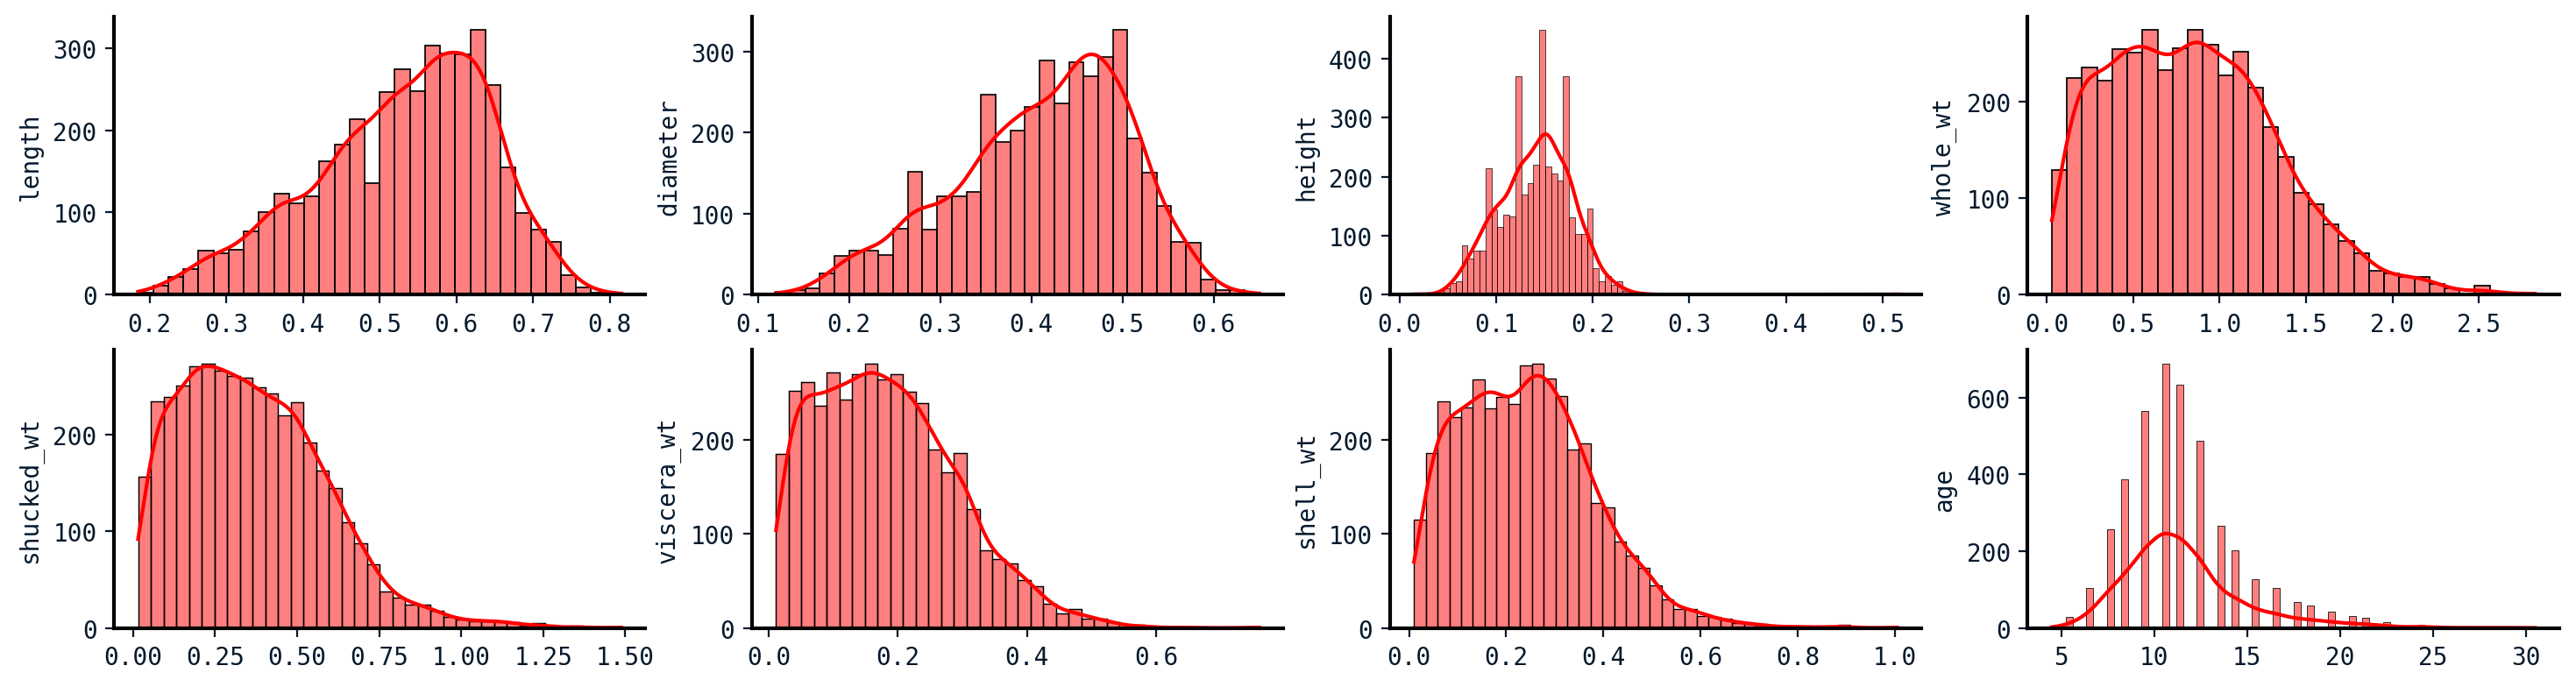

In [17]:
for i, column in enumerate(list(df.columns[1:
]), 1):
    plt.subplot(3,4,i)
    sns.histplot(x=column,data=df,stat='count',kde=True,color='red')
    plt.ylabel(column)
    sns.despine()
    plt.xlabel('')

Transforming the features to look more like a Normal-Gaussian distribution can improve the accuracy of our model because many statistical and machine learning algorithms assume that the data follows a normal distribution. When the data is not normally distributed, these algorithms may not perform optimally, resulting in biased or inaccurate predictions.

To address this issue, we can apply transformations such as logarithmic, exponential, or power transformations to the data to make it look more like a normal distribution. These transformations can help to reduce skewness, compress the data range, and improve the fit to a normal distribution.

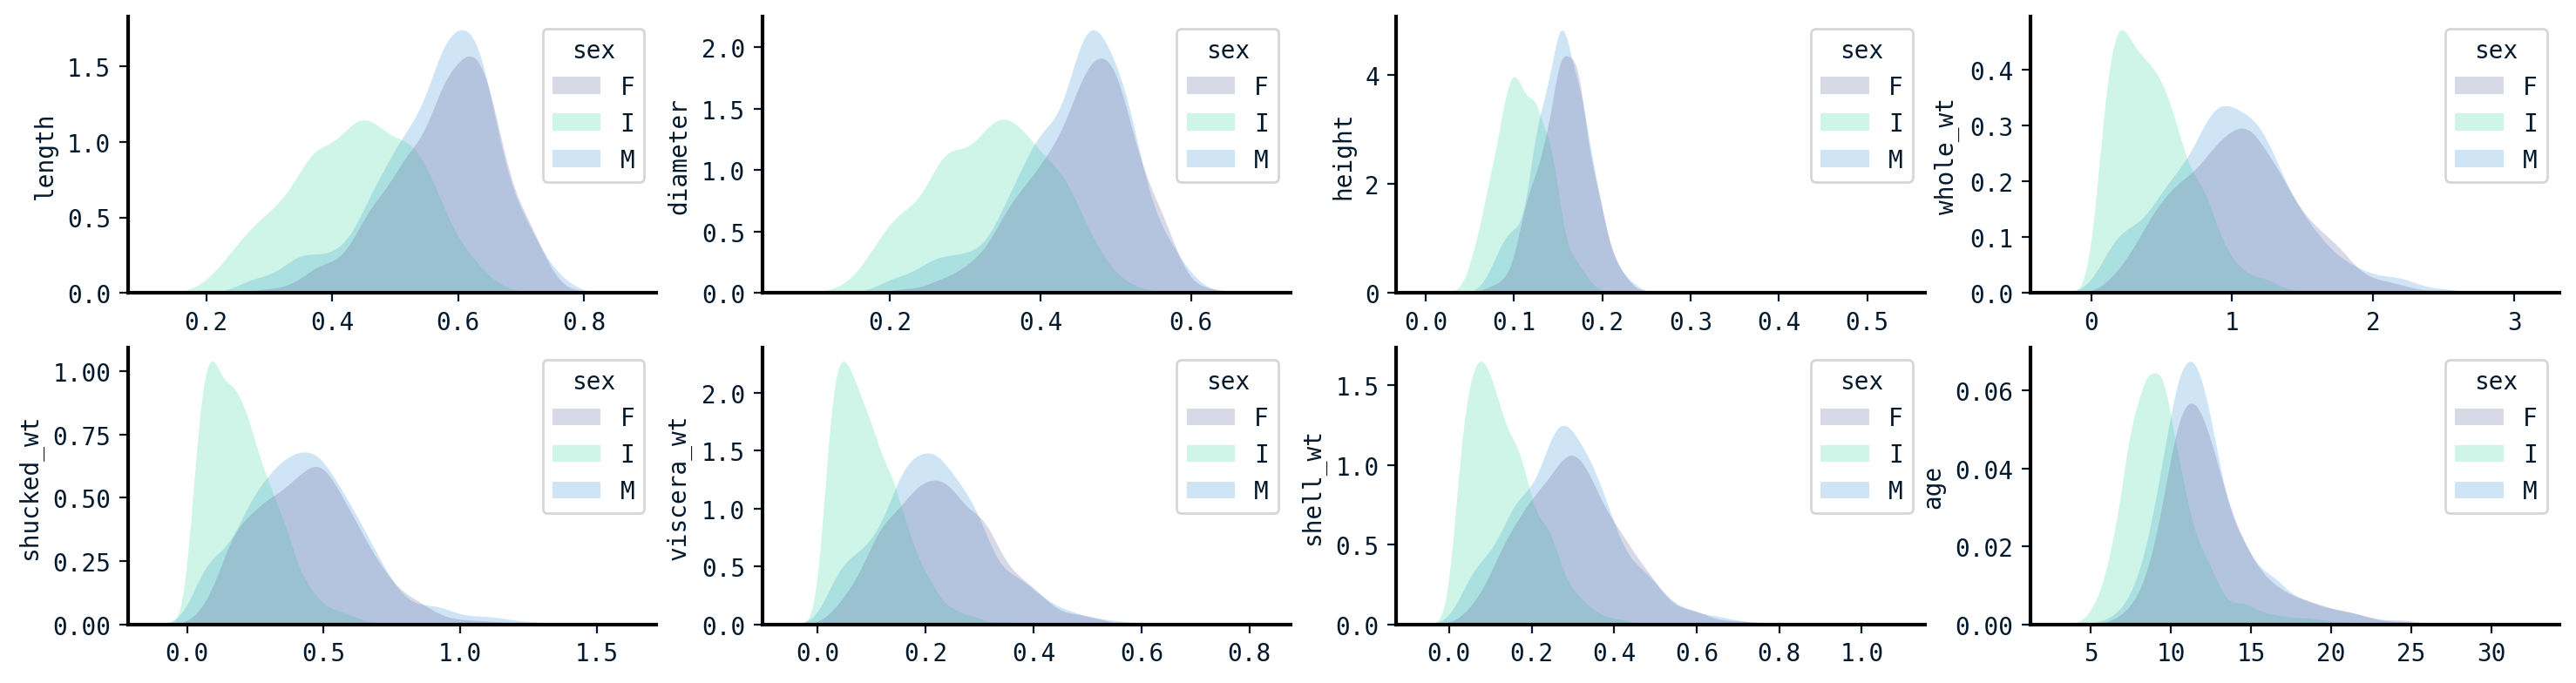

In [18]:
for i, column in enumerate(list(df.columns[1:]), 1):
    plt.subplot(3,4,i)
    sns.kdeplot(x=column,
                data=df,
                hue='sex', 
                fill=True, 
                common_norm=True, 
                linewidth=0)
    plt.ylabel(column)
    sns.despine()
    plt.xlabel('')

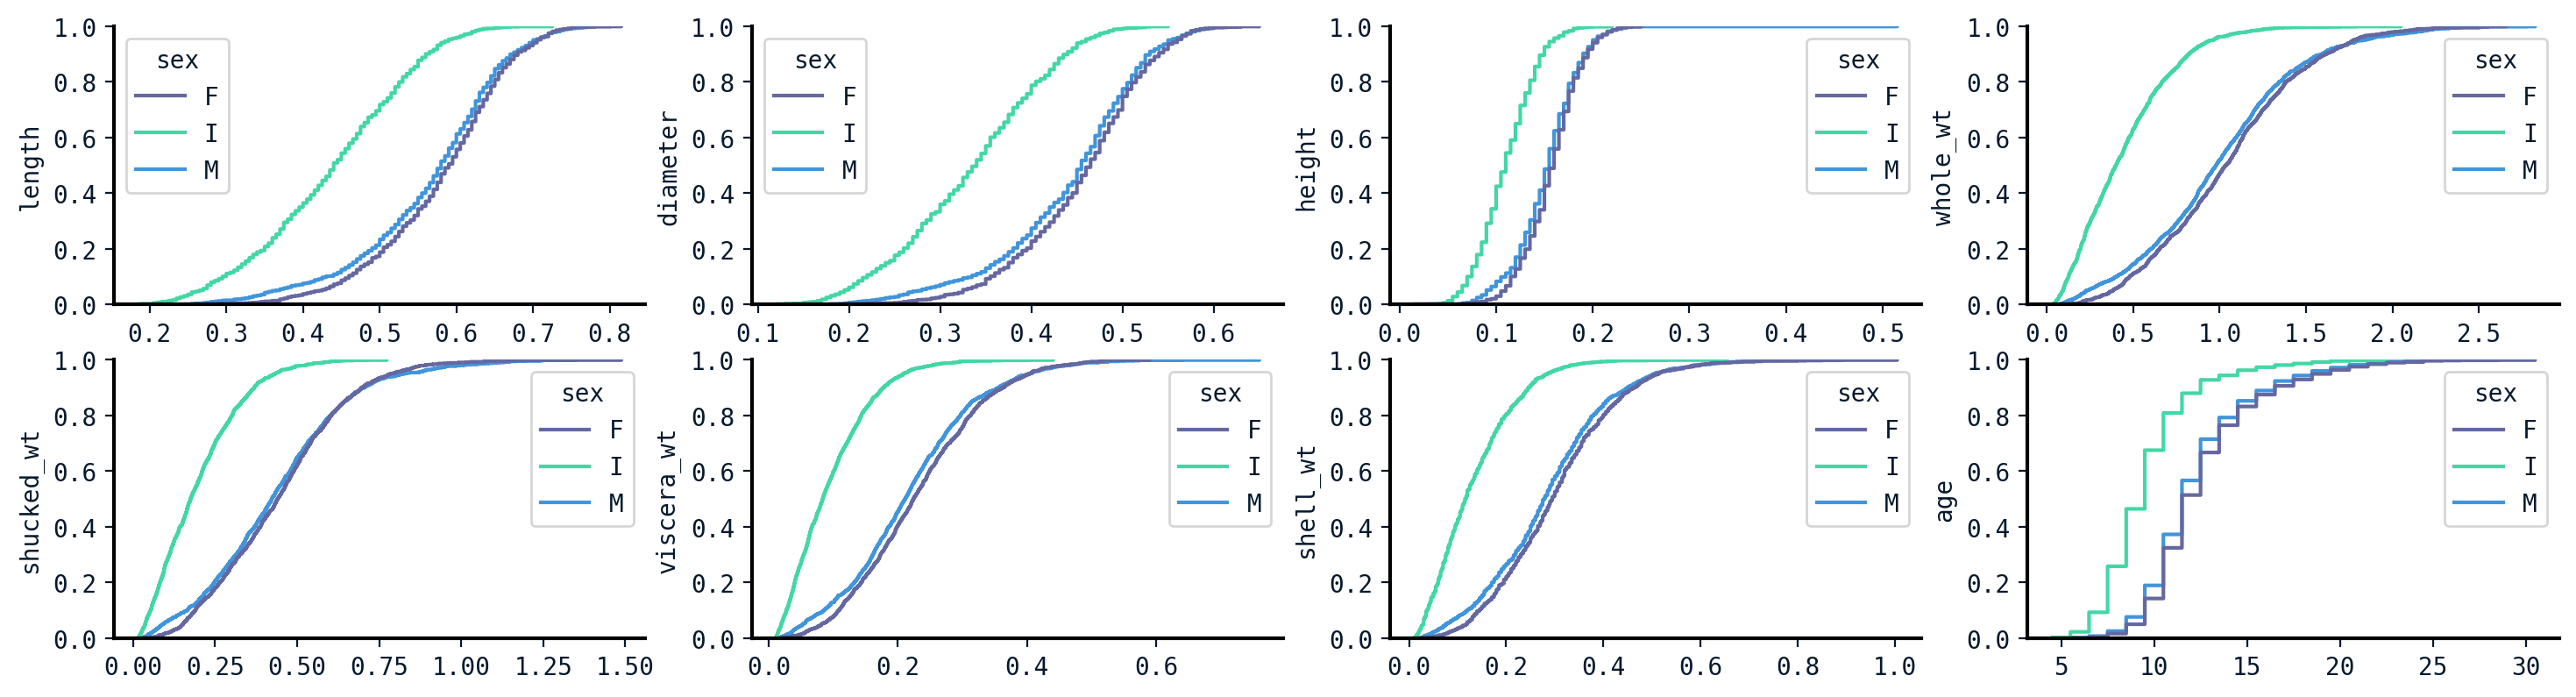

In [19]:
for i, column in enumerate(list(df.columns[1:]), 1):
    plt.subplot(3,4,i)
    sns.ecdfplot(x=column,data=df, hue='sex')
    plt.ylabel(column)
    sns.despine()
    plt.xlabel('')

### 2.3 Heatmap

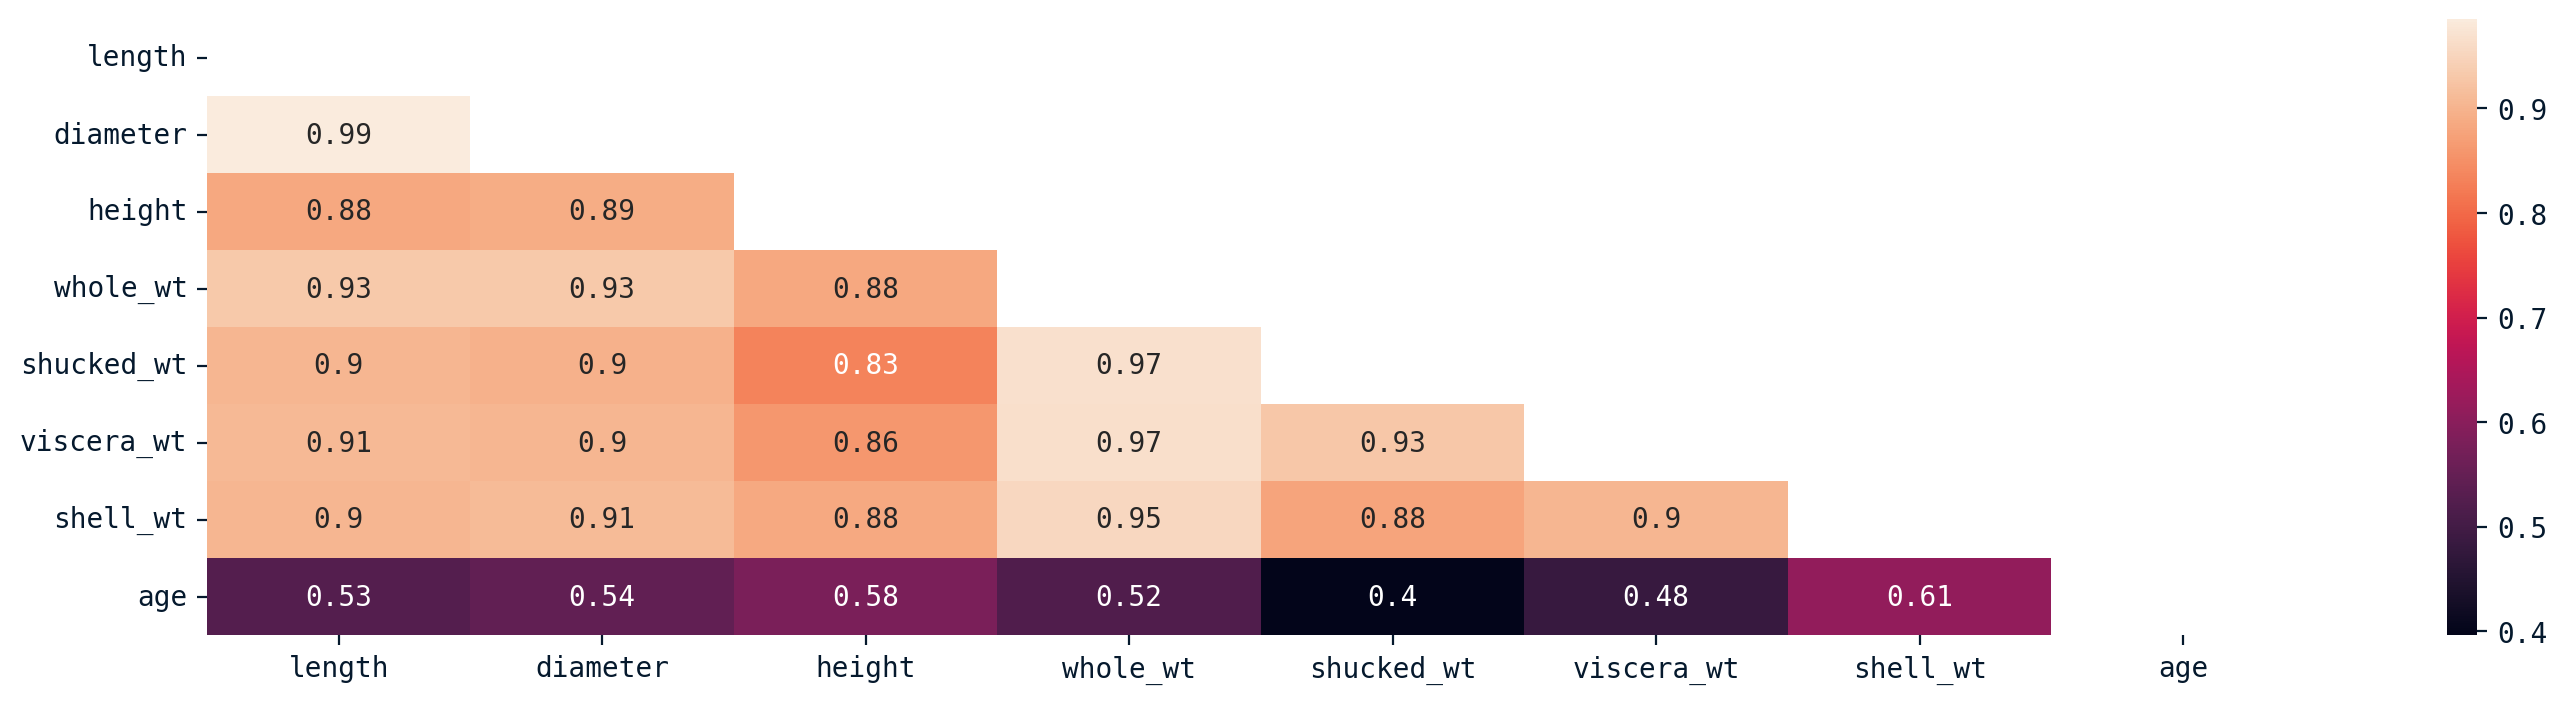

In [20]:
mask = np.triu(np.ones_like(df.corr()))

plt.figure(figsize=(17, 4))
sns.heatmap((df.corr()), annot=True, mask=mask);

The heatmap correlation that shows high correlation coefficients (0.9 or higher) between the features indicates that there is high collinearity among the features. 

Collinearity occurs when two or more independent variables are highly correlated with each other, making it difficult for the model to distinguish the individual effects of each variable on the dependent variable.

To address the issue of collinearity, we can use feature selection techniques to identify the most important features and remove the redundant ones. Alternatively, we can use regularization techniques such as Lasso or Ridge regression, which can penalize the coefficients of highly correlated features and reduce their impact on the model. 

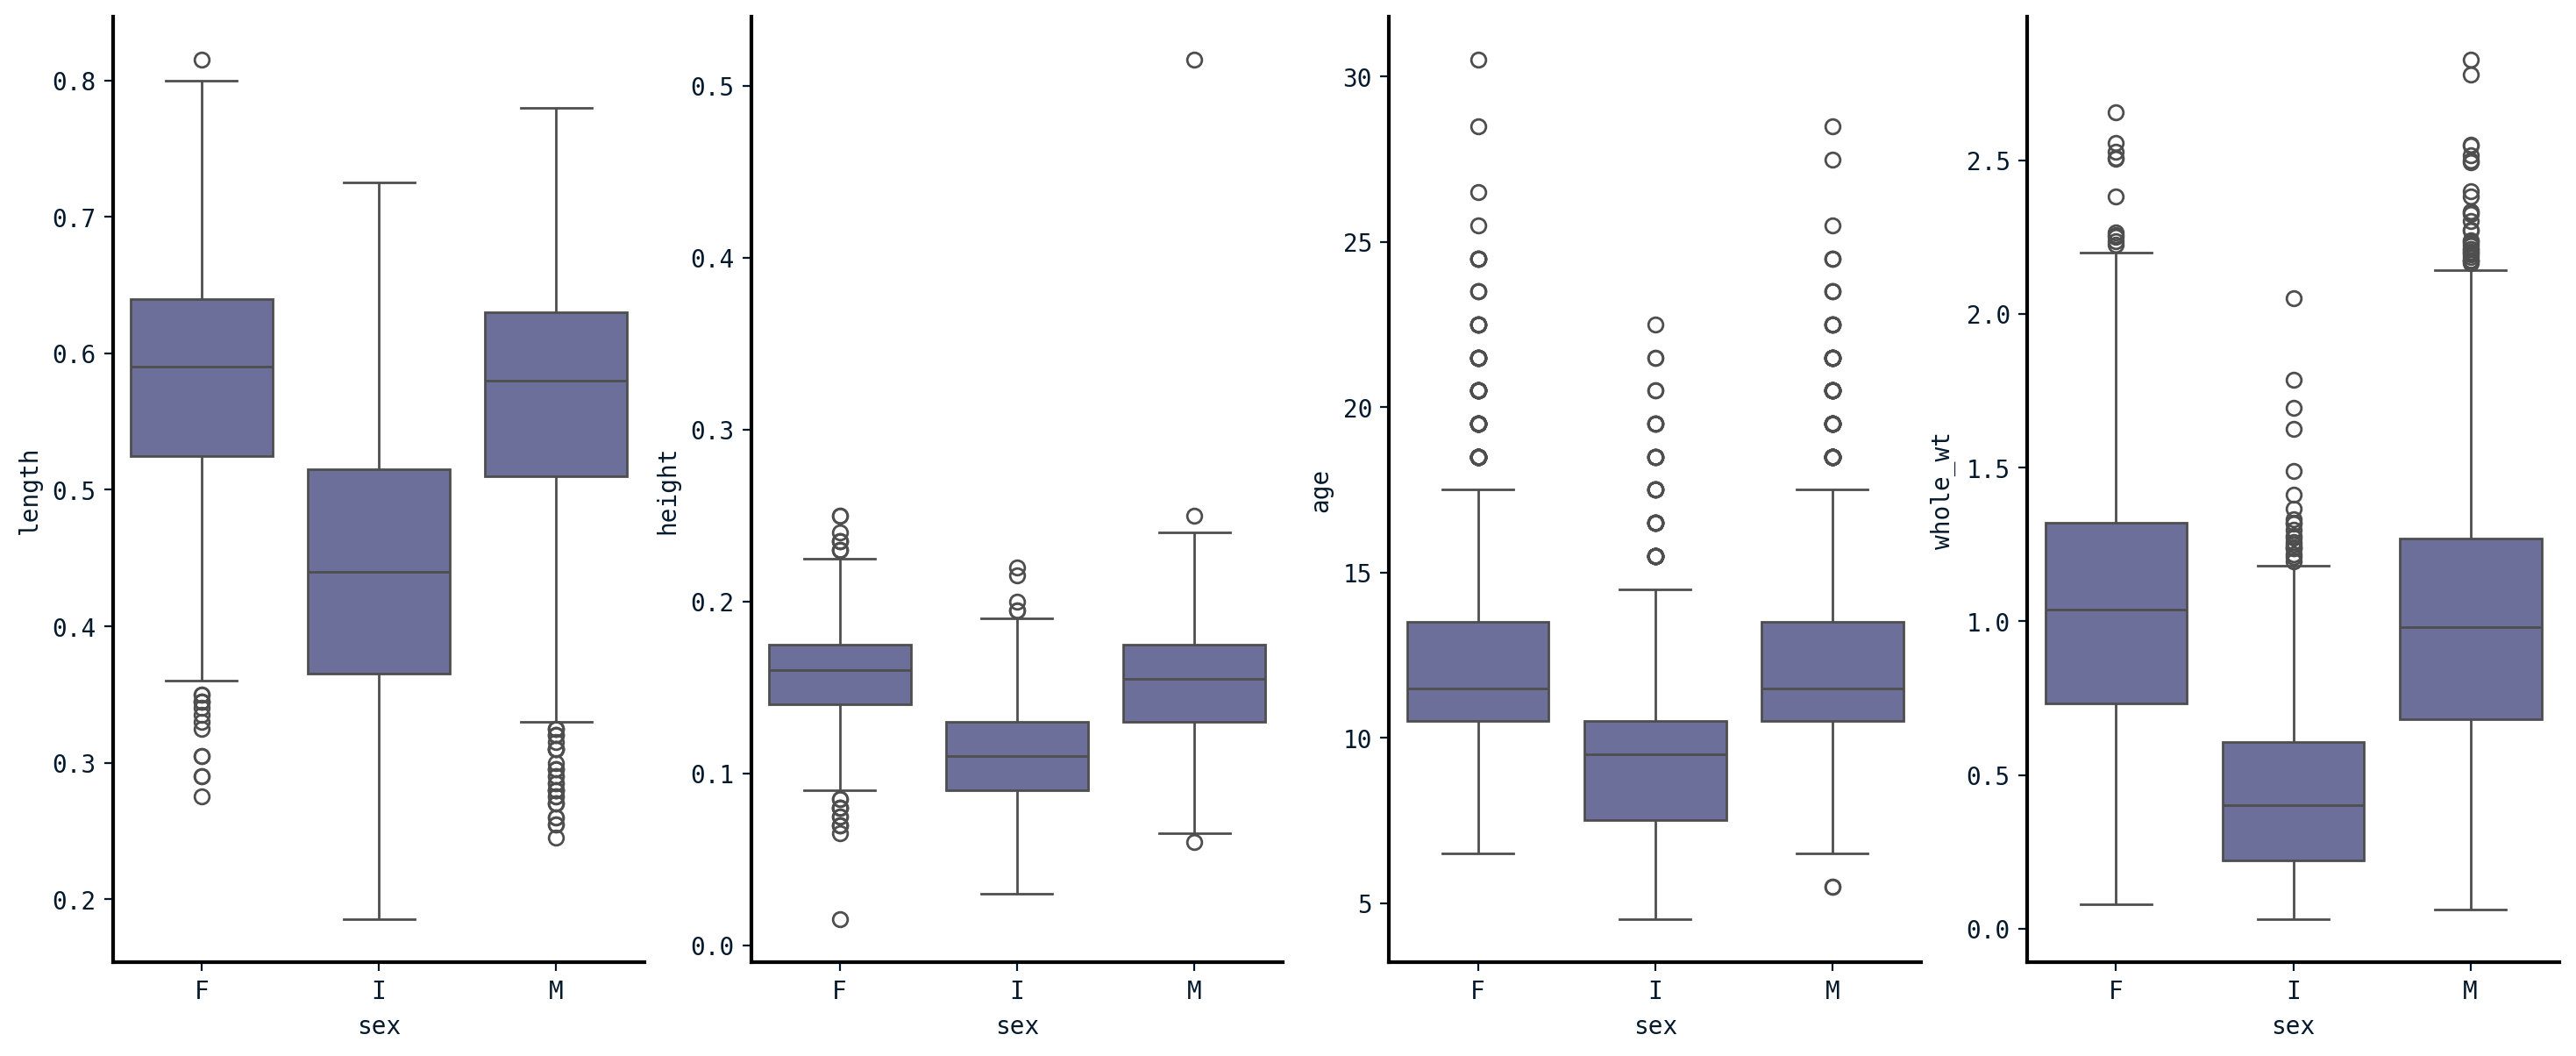

In [21]:
for i in enumerate(['length','height', 'age', 'whole_wt'],1):
    plt.subplot(1,4,i[0])
    sns.boxplot(x='sex', y=i[1], data=df)
    sns.despine()

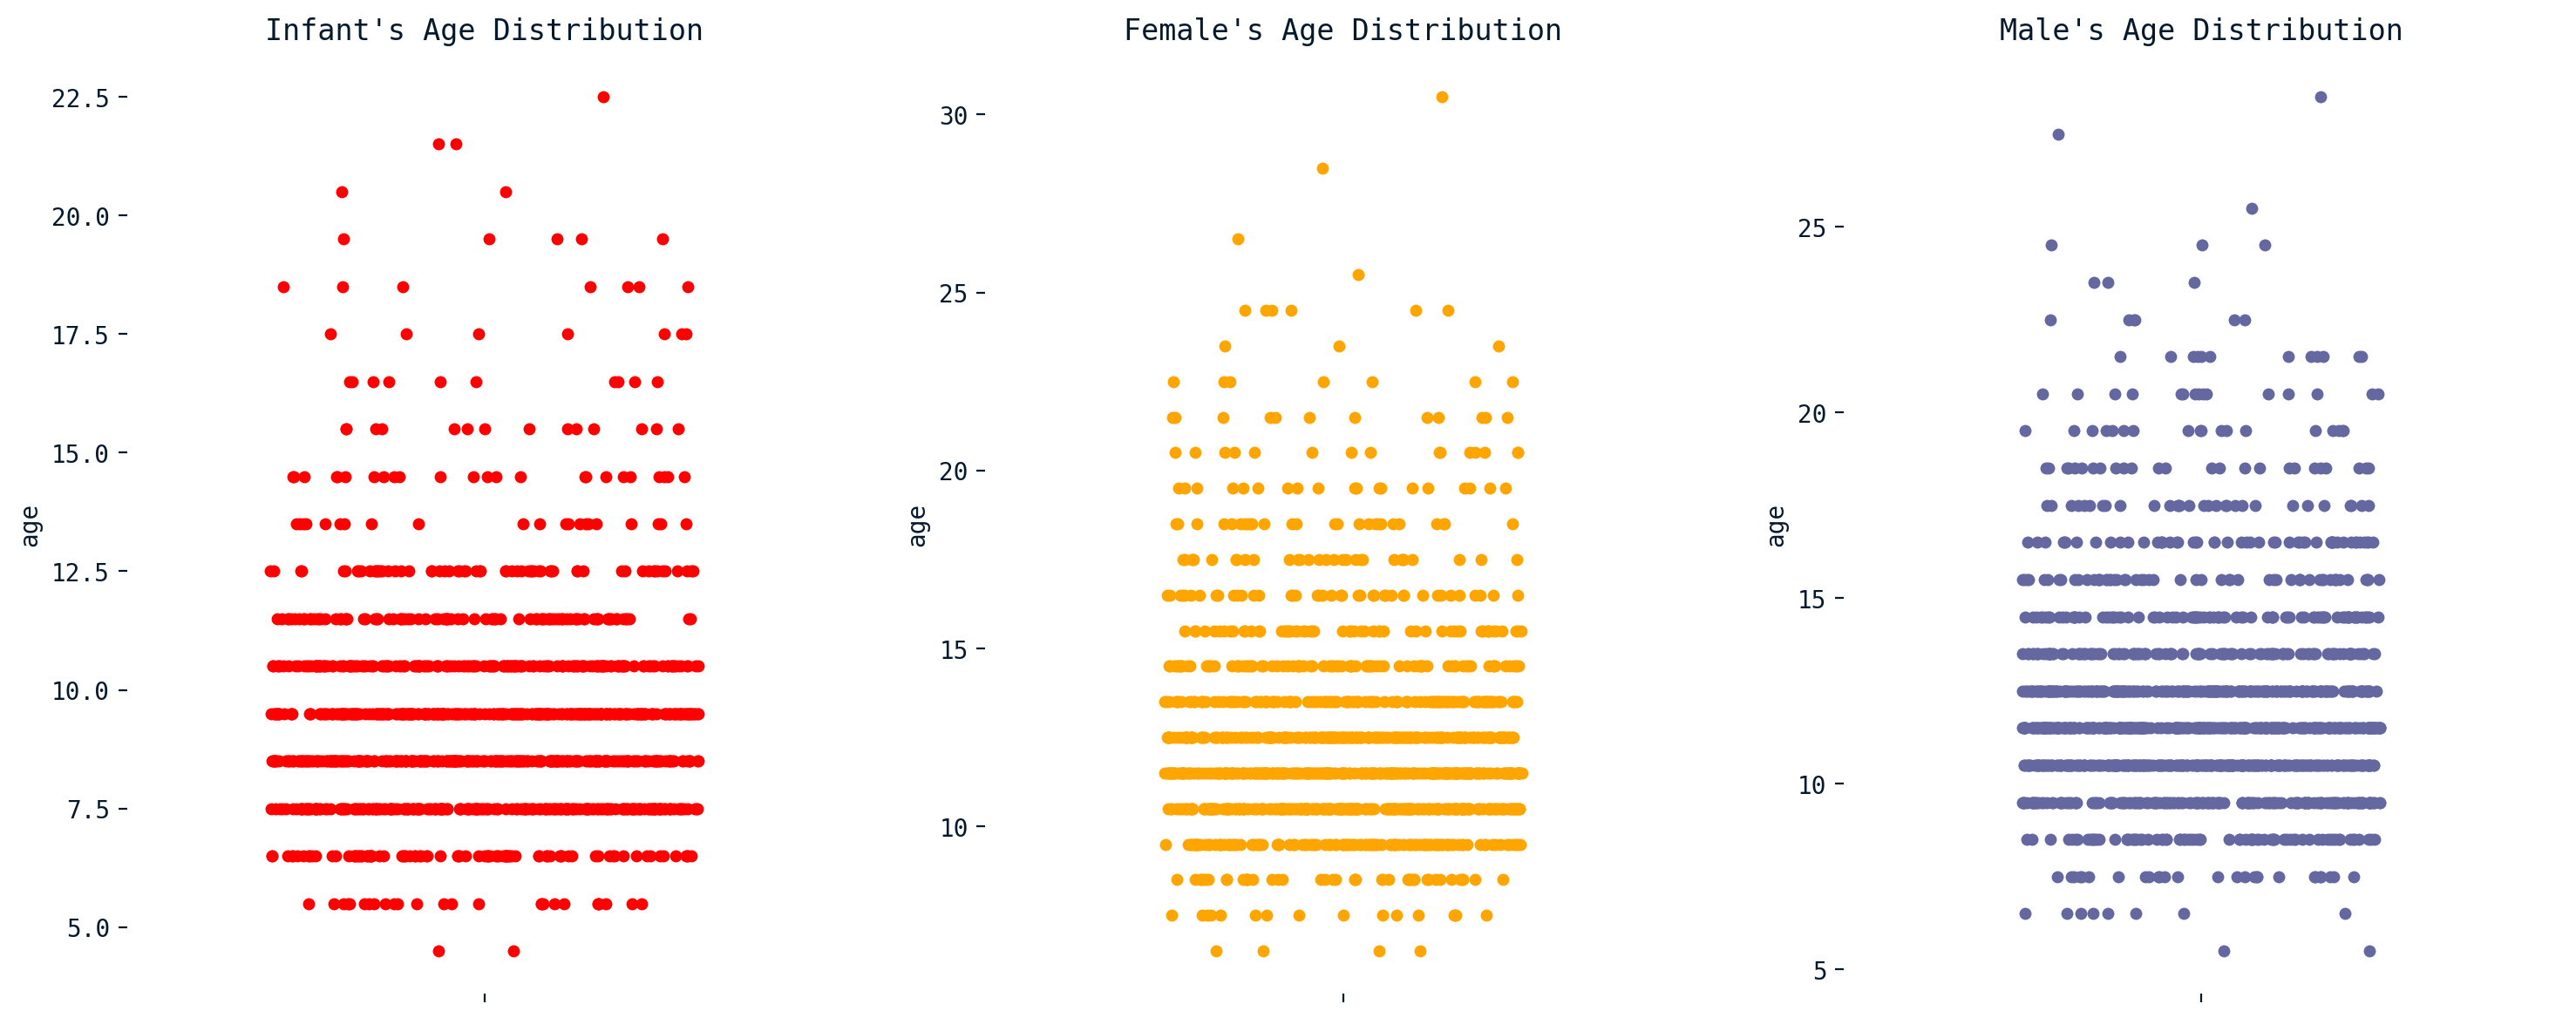

In [22]:
fig, ax = plt.subplots(ncols=3)
sns.stripplot(y='age', data=df[df['sex']=='I'], jitter=.3, ax=ax[0], color='red')
ax[0].set_title("Infant's Age Distribution")
sns.stripplot(y='age', data=df[df['sex']=='F'], jitter=.25, ax=ax[1], color='orange')
ax[1].set_title("Female's Age Distribution")
sns.stripplot(y='age', data=df[df['sex']=='M'], jitter=.25, ax=ax[2])
ax[2].set_title("Male's Age Distribution")

sns.despine(bottom=True, left=True)

# 3.0 Model Implementation.

In [29]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoLarsCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_log_error

In [30]:
X = df.drop(['age'], axis=1)
y = df['age']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train.shape, X_test.shape

((3291, 8), (823, 8))

In [33]:
num_cols = [col for col in X_train.columns if col!='sex']

In [56]:
col_transformer = make_column_transformer(
                (OneHotEncoder(), ['sex']), 
                (StandardScaler(), num_cols),
                (PolynomialFeatures(degree=2), num_cols),
                remainder='passthrough', 
                n_jobs=-1
                )

alphas_log = np.logspace(-4, 1, num=20)
lasso_lars = LassoLarsCV(cv=5, n_jobs=-1, fit_intercept=True)
pca = PCA(n_components=4, random_state=42)

pipeline = make_pipeline(col_transformer, lasso_lars)

In [57]:
pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)

In [58]:
r2 = r2_score(y_train , y_train_pred)
rmlse = np.sqrt(mean_squared_log_error(y_train, y_train_pred))

print(f"R-squared: {r2:.4f}")
print(f"RMSLE: {rmlse:.4f}")

R-squared: 0.5637
RMSLE: 0.1517


In [33]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(250, 150),
                             activation='relu',
                             solver='adam',
                             max_iter=200,
                             early_stopping=True,
                             random_state=42)

mlp_pipeline = make_pipeline(col_transformer, mlp_regressor)
mlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['length', 'diameter',
                                                   'height', 'whole_wt',
                                                   'shucked_wt', 'viscera_wt',
                                                   'shell_wt']),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(),
                                                  ['length', 'diameter',
                                                   'height', 'whole_wt',
                                                   'shucked_wt', 'viscera_wt',
                                                   'shell_wt'])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(250, 150, 100, 50),
                              random_state=42))])

In [34]:
y_train_pred_mlp = mlp_pipeline.predict(X_train)

r2 = r2_score(y_train , y_train_pred_mlp)
rmlse = np.sqrt(mean_squared_log_error(y_train, y_train_pred_mlp))

print(f"Train R-squared: {r2:.4f}")
print(f"Train RMSLE: {rmlse:.4f}")

Train R-squared: 0.5970
Train RMSLE: 0.1461


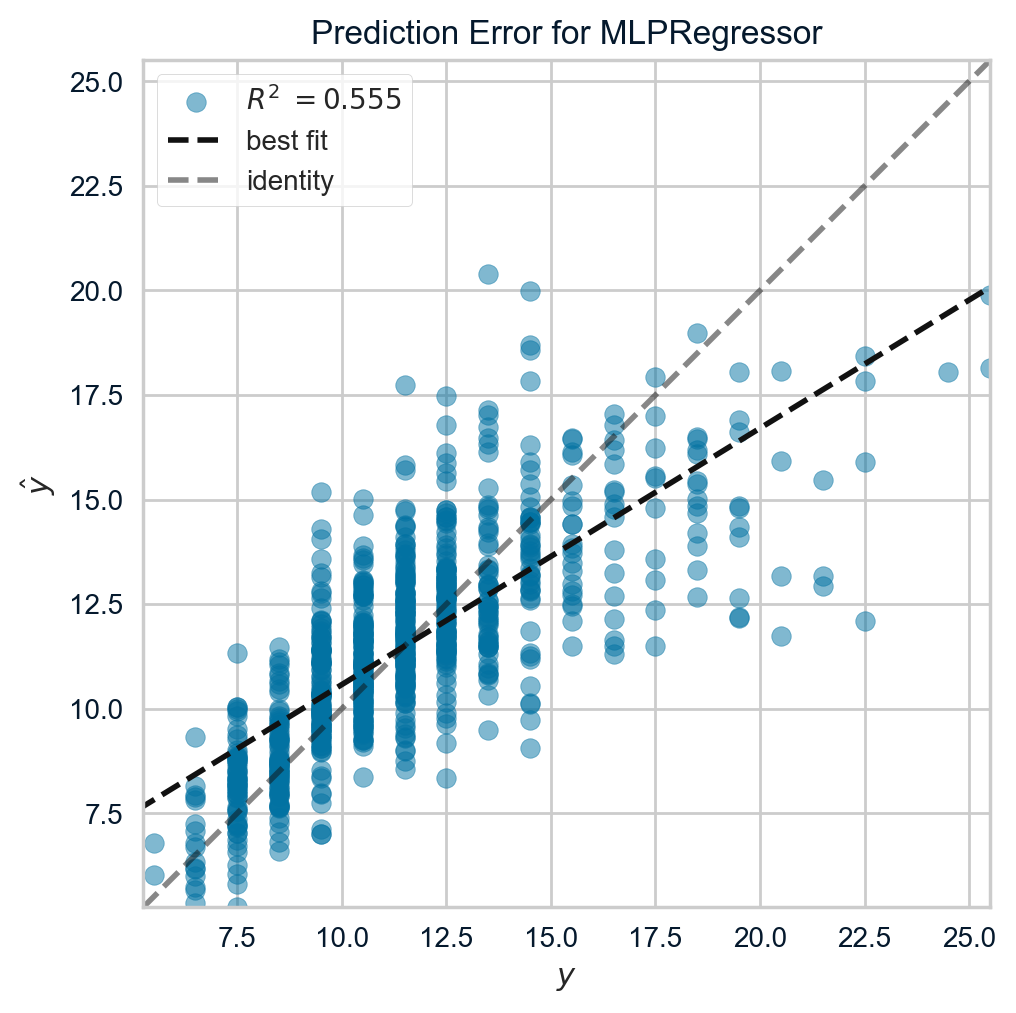

In [36]:
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot

visualizer = prediction_error(mlp_pipeline, X_train, y_train, X_test, y_test, alpha=.5)

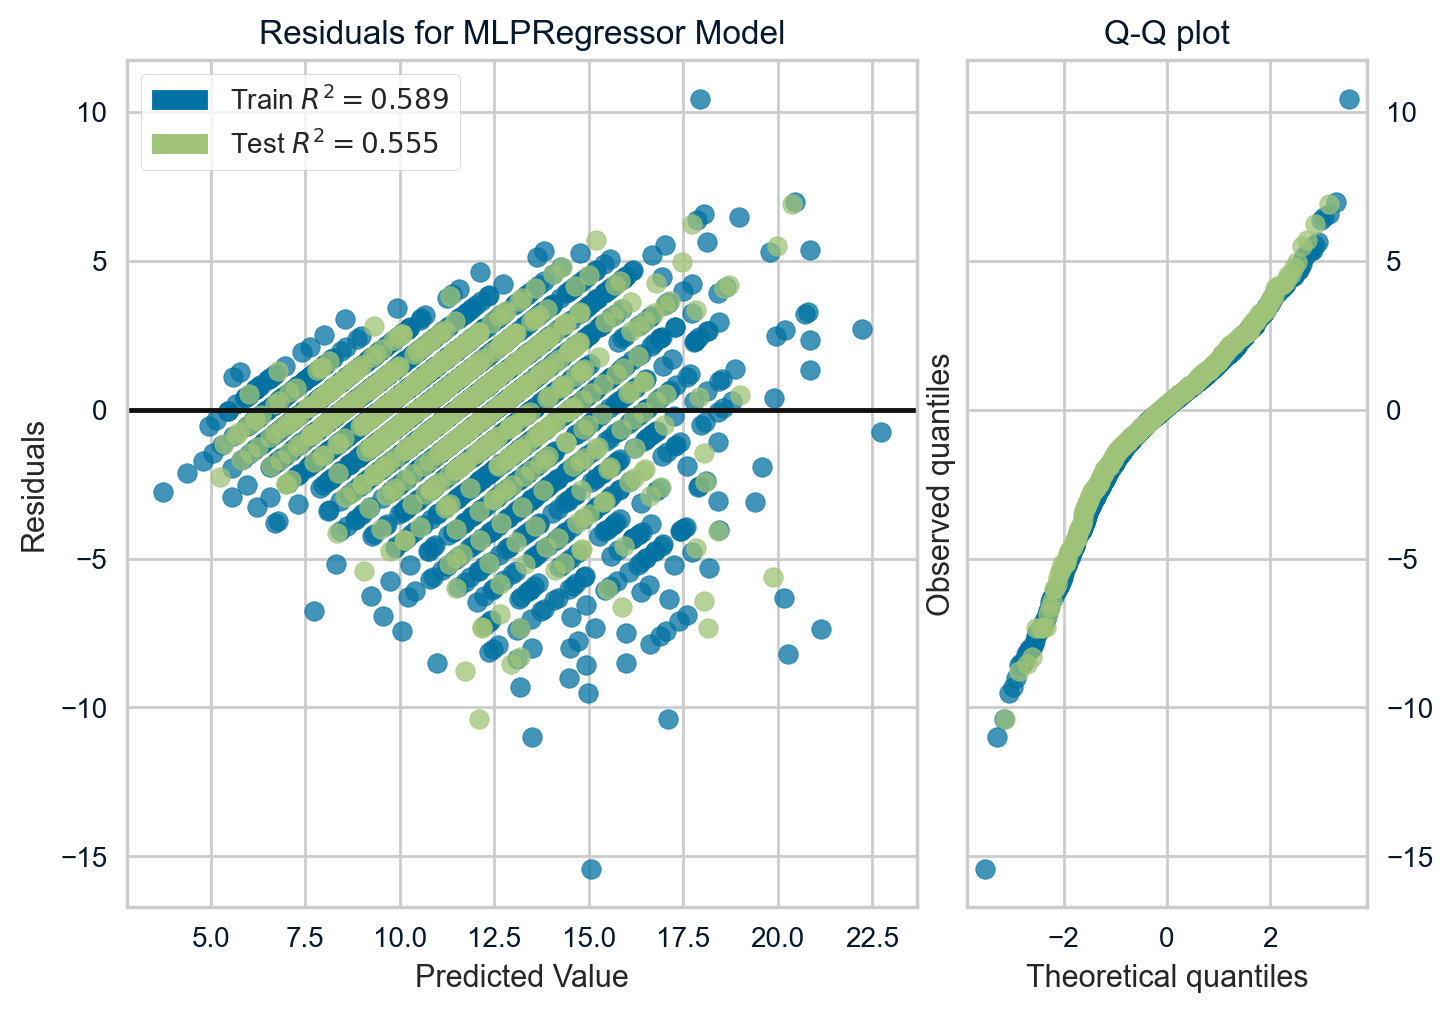

In [37]:
viz = residuals_plot(mlp_pipeline, X_train, y_train, X_test, y_test, hist=False, qqplot=True)